In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Datasets/Movies_Merged.csv'
movies_data = pd.read_csv(file_path)
#print(movies_data.head(1).to_dict(orient='records'))

# Analyzing the trends in Data : Data Visualization and Insights

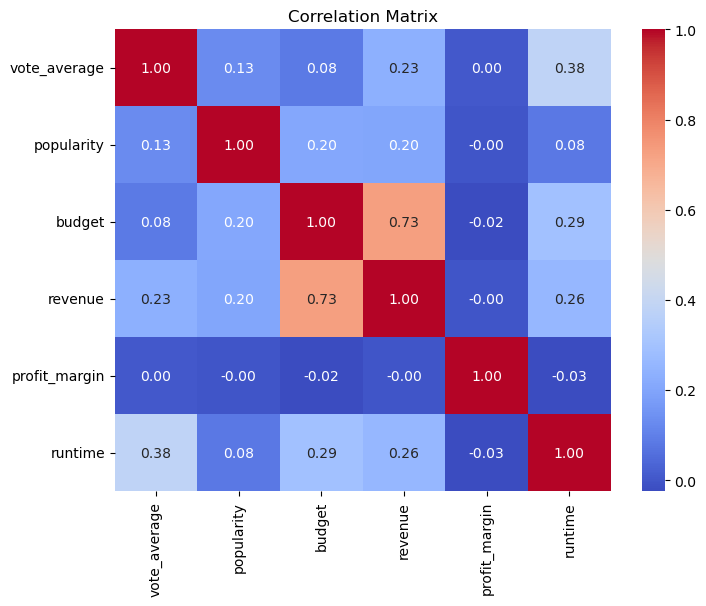

In [2]:
# --- 1. Data Cleaning ---
# Convert `budget`, `revenue`, `vote_average`, `popularity` to numeric if not already
movies_data['budget'] = pd.to_numeric(movies_data['budget'], errors='coerce')
movies_data['revenue'] = pd.to_numeric(movies_data['revenue'], errors='coerce')

# Remove rows with missing or zero values in critical columns
movies_data = movies_data[
    (movies_data['vote_average'].notnull()) & 
    (movies_data['popularity'].notnull()) &
    (movies_data['budget'] > 0) &
    (movies_data['revenue'] > 0)
]

# Calculate profit margin
movies_data['profit_margin'] = (movies_data['revenue'] - movies_data['budget']) / movies_data['budget']

# Handle Genres (Extract primary genre)
movies_data['Primary_Genre'] = movies_data['Genres'].str.split(',').str[0]

# Handle Release Year
movies_data['release_year'] = pd.to_datetime(movies_data['Release Date'], errors='coerce').dt.year

# --- 2. Exploratory Data Analysis ---
# Correlation matrix for numeric columns
numeric_columns = ['vote_average', 'popularity', 'budget', 'revenue', 'profit_margin', 'runtime']
correlation_matrix = movies_data[numeric_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**Insights:**
1. Budget and revenue have +ve corelation, higher-budget movies tend to generate more revenue
2. Weak or no correlation between budget and vote_average confirms spending more on a movie doesn't guarantee higher ratings.

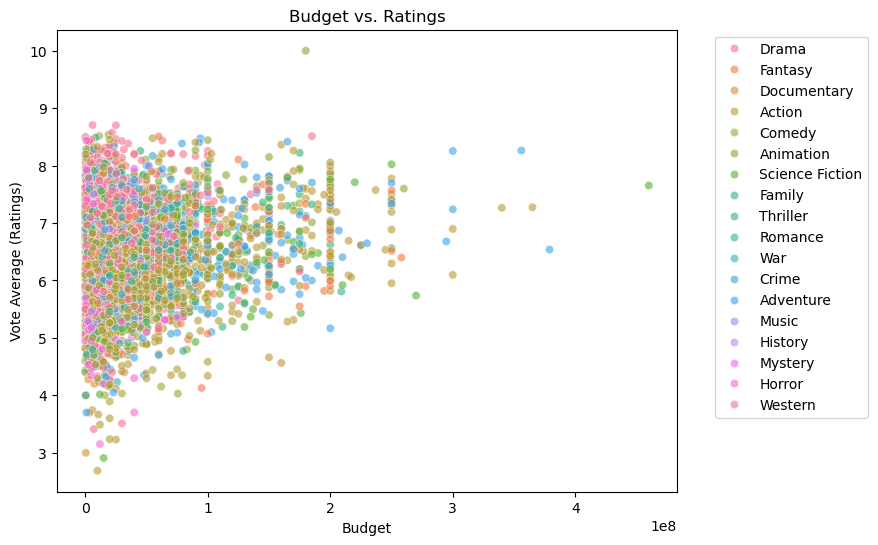

In [3]:
# Scatter plot: Budget vs. Ratings
plt.figure(figsize=(8, 6))
sns.scatterplot(data=movies_data, x='budget', y='vote_average', hue='Primary_Genre', alpha=0.6)
plt.title("Budget vs. Ratings")
plt.xlabel("Budget")
plt.ylabel("Vote Average (Ratings)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Insights:** Higher budget does not guarantee better ratings, smaller films with strong storytelling or niche appeal succeed critically.

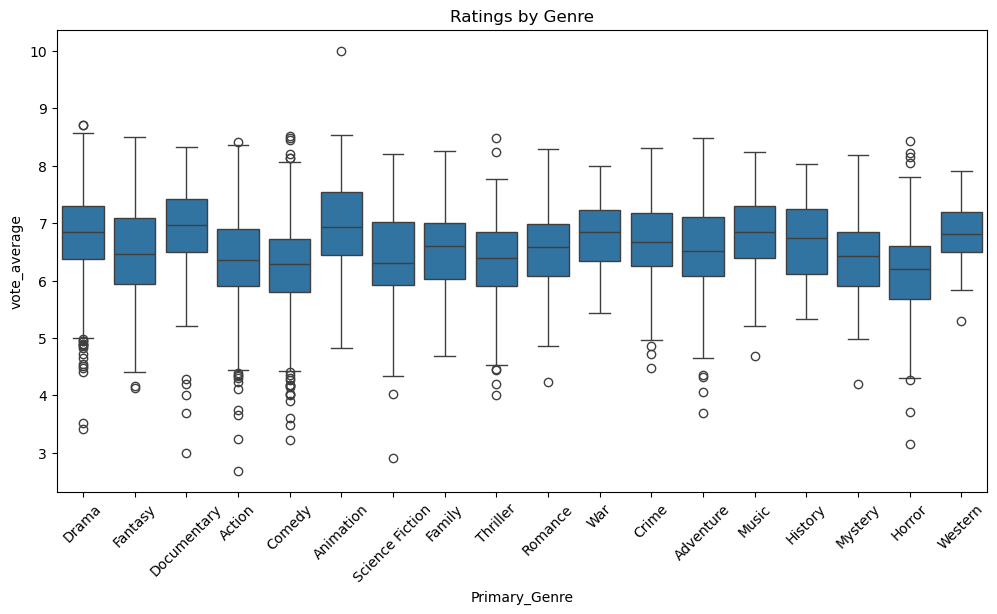

In [4]:
# Box plot: Ratings by Genre
plt.figure(figsize=(12, 6))
sns.boxplot(data=movies_data, x='Primary_Genre', y='vote_average')
plt.title("Ratings by Genre")
plt.xticks(rotation=45)
plt.show()

**Insights:**
1. Animation, Horror, Action Genres are highly rated.
2. Minimum ratings Documentry, War and History Genres are greater than 5.

<Axes: title={'center': 'Average Profit Margin by Genre'}, xlabel='Primary_Genre'>

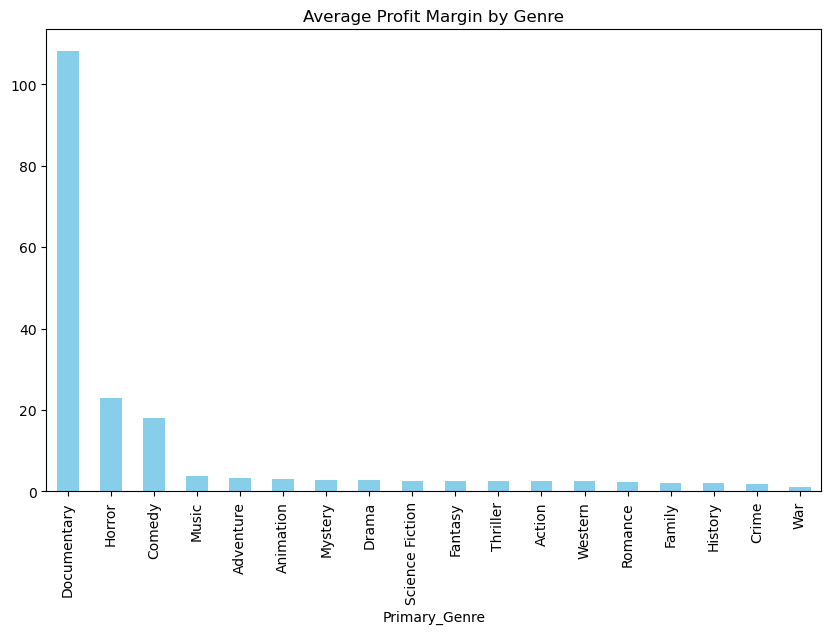

In [5]:
# Average profit margin by genre
avg_profit_by_genre = movies_data.groupby('Primary_Genre')['profit_margin'].mean().sort_values(ascending=False)
avg_profit_by_genre.plot(kind='bar', figsize=(10, 6), color='skyblue', title="Average Profit Margin by Genre")

**Insights:** Documentry movies have more than 100% highest profit Margin.

<Axes: title={'center': 'Profit Margin Trends Over Time'}, xlabel='release_year'>

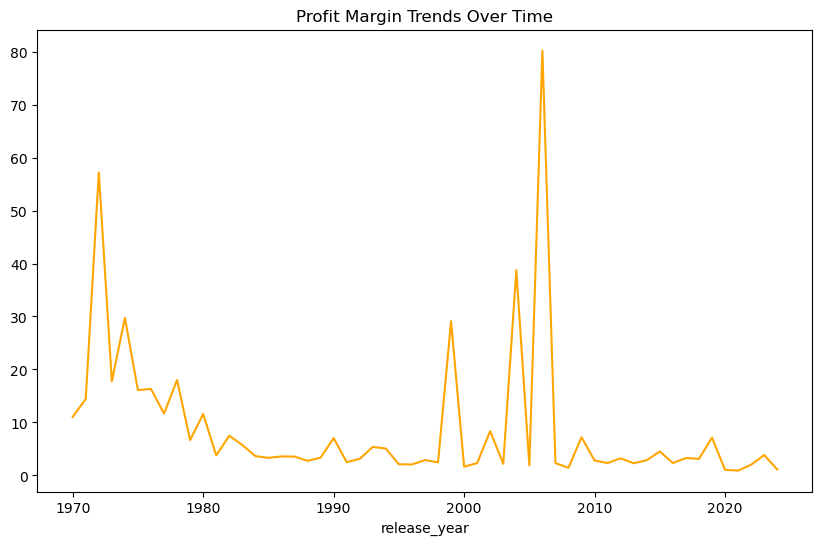

In [6]:
# Average profit margin by release year
avg_profit_by_year = movies_data.groupby('release_year')['profit_margin'].mean()
avg_profit_by_year.plot(figsize=(10, 6), color='orange', title="Profit Margin Trends Over Time")

Nothing conclusive

<Axes: title={'center': 'Average Popularity Over Years'}, xlabel='release_year'>

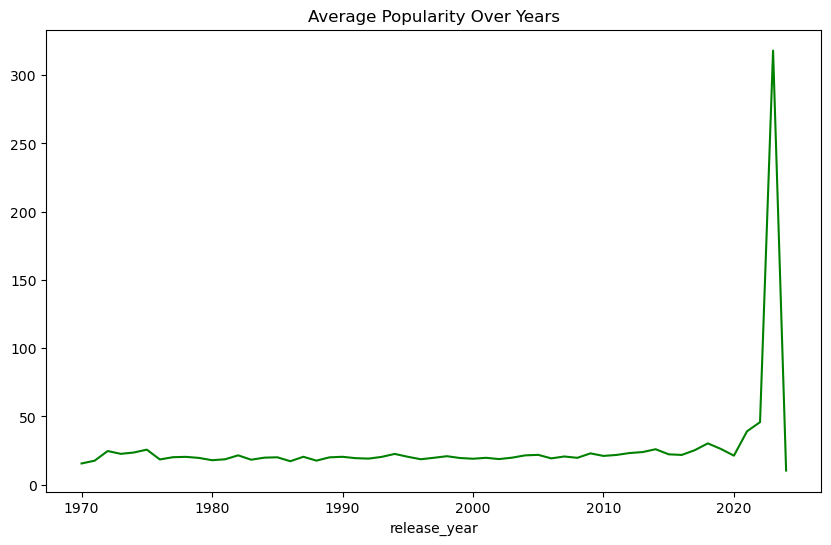

In [7]:
# Popularity over time
popularity_by_year = movies_data.groupby('release_year')['popularity'].mean()
popularity_by_year.plot(figsize=(10, 6), title="Average Popularity Over Years", color='green')

Nothing conclusive

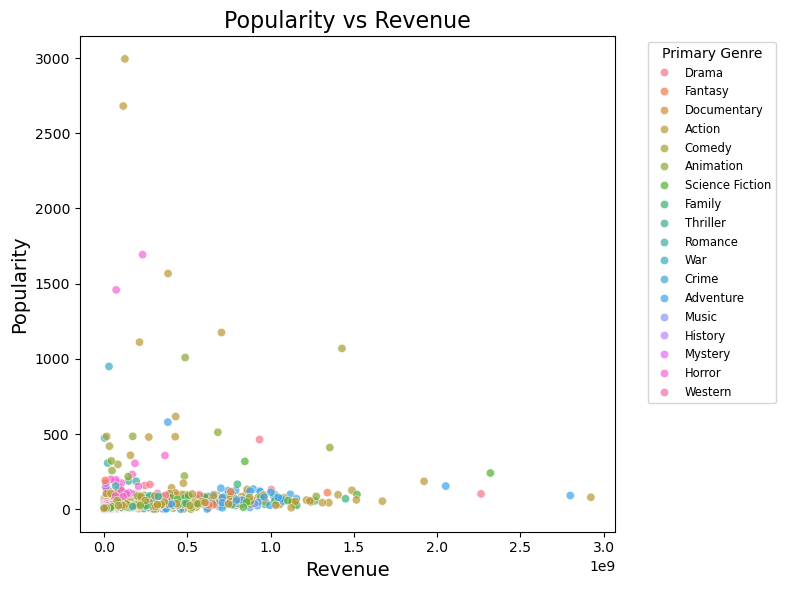

In [8]:
# Scatter plot for popularity vs. revenue
plt.figure(figsize=(8, 6))  # Adjust figure size for better visibility
sns.scatterplot(data=movies_data, x='revenue', y='popularity', hue='Primary_Genre', alpha=0.7)

# Add title and labels
plt.title("Popularity vs Revenue", fontsize=16)
plt.xlabel("Revenue", fontsize=14)
plt.ylabel("Popularity", fontsize=14)

# Adjust legend placement and appearance
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Primary Genre", fontsize='small', title_fontsize='medium')

# Tighten layout to avoid clipping
plt.tight_layout()
plt.show()

Nothing Conclusive

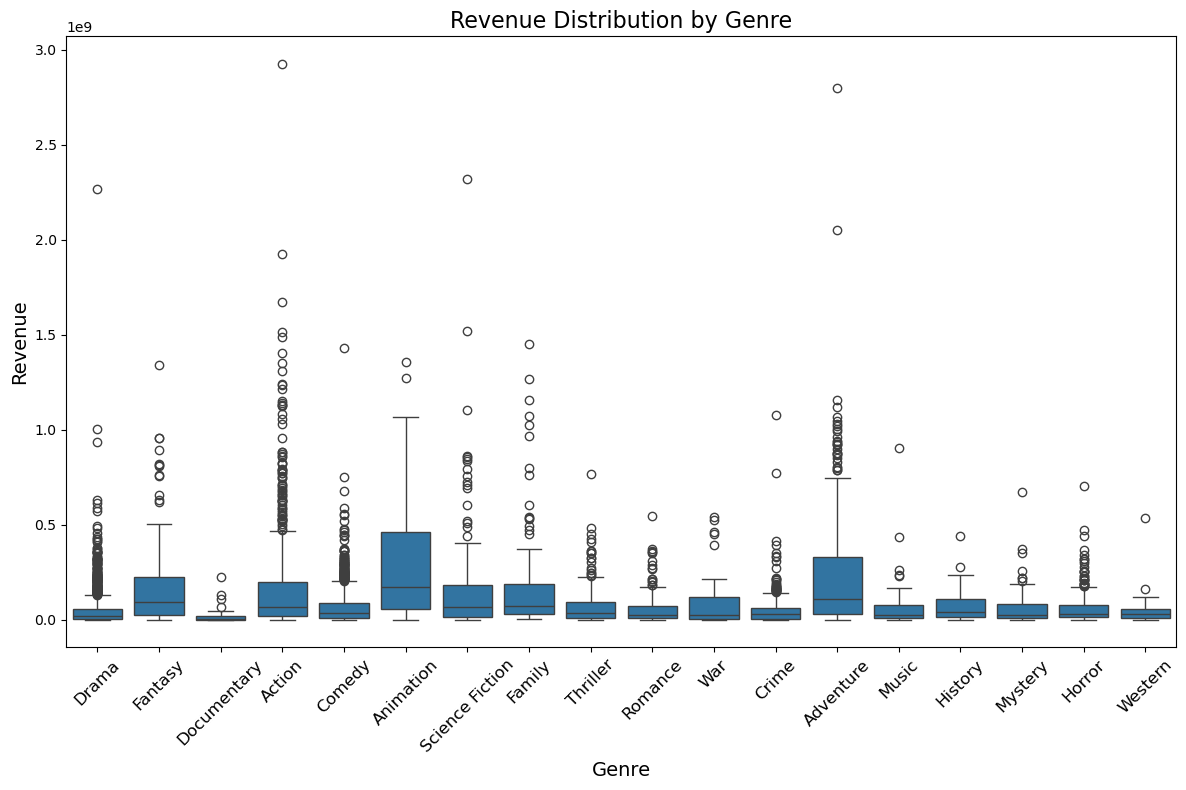

In [9]:
# Revenue distribution by genre
plt.figure(figsize=(12, 8))  # Increase figure size for better spacing
sns.boxplot(data=movies_data, x='Primary_Genre', y='revenue')

# Add title and labels
plt.title("Revenue Distribution by Genre", fontsize=16)
plt.xlabel("Genre", fontsize=14)
plt.ylabel("Revenue", fontsize=14)

# Rotate x-axis labels to avoid clutter
plt.xticks(rotation=45, fontsize=12)

# Tighten layout to ensure all elements fit well
plt.tight_layout()
plt.show()

**Insights:** Animation Genre have higher revenue in general, Action Genre have more outliers towards higher revenue side.

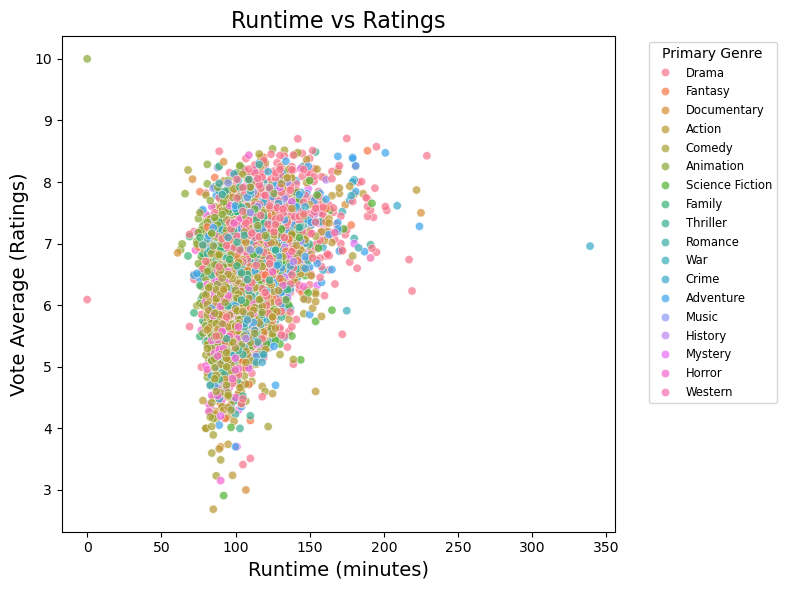

In [10]:
plt.figure(figsize=(8, 6))  # Adjust figure size for better visibility
sns.scatterplot(data=movies_data, x='runtime', y='vote_average', hue='Primary_Genre', alpha=0.7)

# Add title and labels
plt.title("Runtime vs Ratings", fontsize=16)
plt.xlabel("Runtime (minutes)", fontsize=14)
plt.ylabel("Vote Average (Ratings)", fontsize=14)

# Adjust legend placement and appearance
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Primary Genre", fontsize='small', title_fontsize='medium')

# Tighten layout to avoid clipping
plt.tight_layout()
plt.show()

**Insights:** Higher than 150min runtime generally have higher ratings

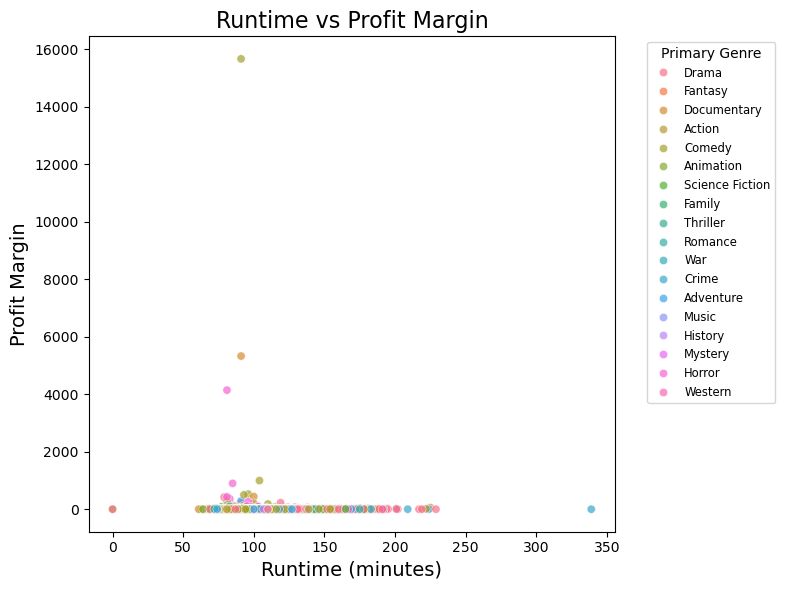

In [11]:
plt.figure(figsize=(8, 6))  # Adjust figure size for better visibility
sns.scatterplot(data=movies_data, x='runtime', y='profit_margin', hue='Primary_Genre', alpha=0.7)

# Add title and labels
plt.title("Runtime vs Profit Margin", fontsize=16)
plt.xlabel("Runtime (minutes)", fontsize=14)
plt.ylabel("Profit Margin", fontsize=14)

# Adjust legend placement and appearance
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Primary Genre", fontsize='small', title_fontsize='medium')

# Tighten layout to avoid clipping
plt.tight_layout()
plt.show()

Nothing Conclusive

<Axes: title={'center': 'Revenue Trends for Action Movies'}, xlabel='release_year'>

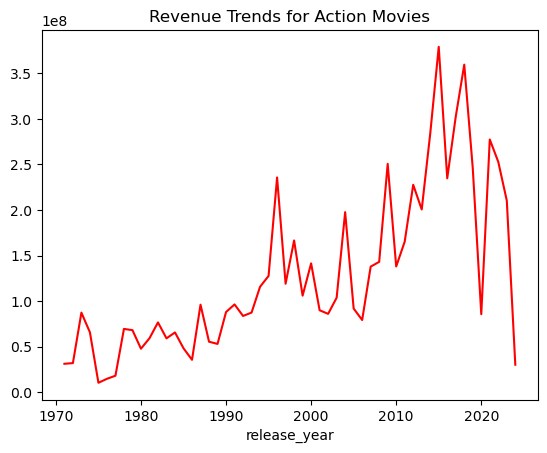

In [12]:
# Action movies over time
action_movies = movies_data[movies_data['Primary_Genre'] == 'Action']
action_movies.groupby('release_year')['revenue'].mean().plot(title="Revenue Trends for Action Movies", color='red')

**Insights:** Revenue of action movies increases year on year but may be that's obvious because of inflation :)

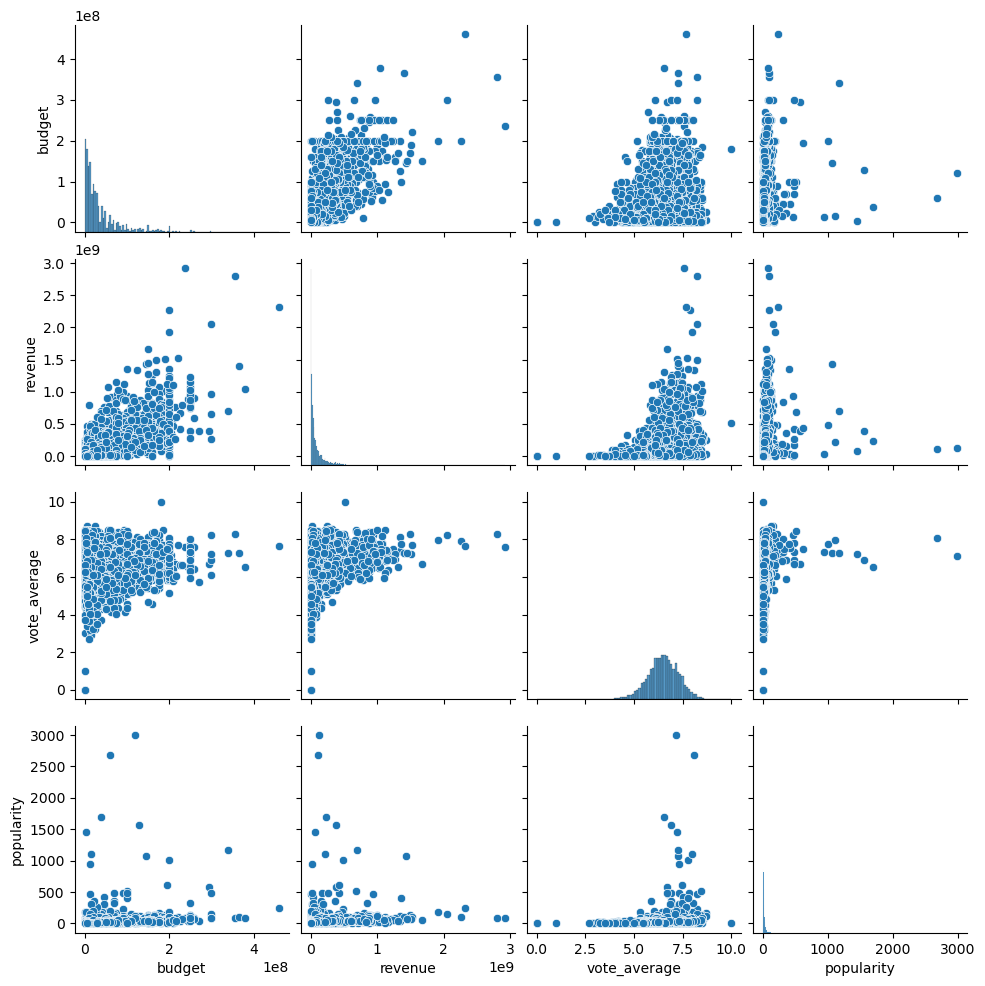

In [13]:
sns.pairplot(movies_data[['budget', 'revenue', 'vote_average', 'popularity']])

**Insights:**
1. Lower budget movies tends to have more higher ratings compared to higher budget movies